# 5.4 Multi-Person Detection

Module - Pose Estimation

For book, references and training materials, please check this project website [http://activefitness.ai/ai-in-sports-with-python](http://activefitness.ai/ai-in-sports-with-python).

Reference: Chapter 7, [Applied Machine Learning for Health and Fitness](https://www.apress.com/us/book/9781484257715)


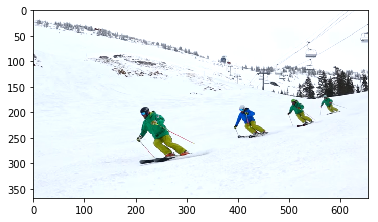

In [18]:
import sys
import time
import os

from tf_pose import common
import cv2
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
import math

import matplotlib.pyplot as plt
%matplotlib inline

model = "cmu"
image_file = "media/multiple_skiers_656x368.png"
image = common.read_imgfile(image_file, None, None)
  
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

[2019-10-01 19:17:39,422] [TfPoseEstimator] [INFO] loading graph from C:\ProgramData\Anaconda3\lib\site-packages\tf_pose-0.1.1-py3.7-win-amd64.egg\tf_pose_data\graph/cmu/graph_opt.pb(default size=656x368)


Loading TensorFlow
inference started...
NUMBER OF PEOPLE  4


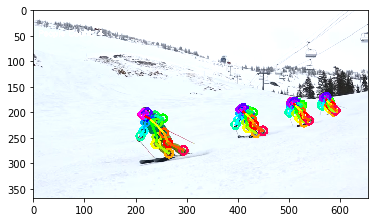

In [19]:
h, w, channels = image.shape

print("Loading TensorFlow")
if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path('cmu'), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path('cmu'), target_size=(w, h))
    
    
experiments_dir = "_experiments"
if not os.path.exists(experiments_dir):
    os.makedirs(experiments_dir)

experiment_dir = time.strftime("%Y%m%d-%H%M%S")
out_dir = experiments_dir + experiment_dir
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

output_json = out_dir + "/json/"
if not os.path.exists(output_json):
    os.makedirs(output_json)

print('inference started...')
t = time.time()
people = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
count_people = len(people)
print("NUMBER OF PEOPLE ", count_people)
image = TfPoseEstimator.draw_humans(image, people, imgcopy=False, output_json_dir=output_json ) 
cv2.putText(image,
            "People Count: %d" % (count_people),
            (10, 50),  cv2.FONT_HERSHEY_SIMPLEX, 0.5,
            (255, 255, 255), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [1]:
import torch
from torchvision import models

kprcnn = models.detection.keypointrcnn_resnet50_fpn(pretrained=True)
kprcnn.eval()

KeypointRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )


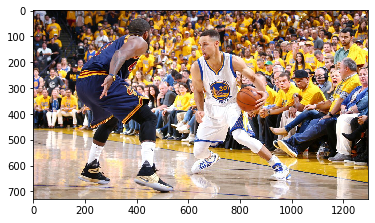

In [2]:
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('./media/basketball.jpg')

plt.imshow(img)
plt.show()

In [3]:
import torchvision.transforms as T

def normalize(img):
    normalize_t = T.Compose([T.Resize(256),
                     T.CenterCrop(224),
                     T.ToTensor(), 
                     T.Normalize(mean = [0.485, 0.456, 0.406], 
                                 std = [0.229, 0.224, 0.225])])
    return normalize_t(img).unsqueeze(0)



img_tensor = normalize(img)
detection = kprcnn(img_tensor)[0]
detection

{'boxes': tensor([[2.1270e+01, 1.9102e+02, 6.9073e+01, 2.2355e+02],
         [0.0000e+00, 0.0000e+00, 5.0218e+01, 9.7418e+01],
         [0.0000e+00, 6.9426e+01, 9.9892e+01, 1.6839e+02],
         [4.7585e-01, 4.8592e-01, 5.0709e+01, 4.2681e+01],
         [2.3997e+01, 1.8798e+02, 5.0938e+01, 2.1850e+02],
         [1.1068e+02, 2.3562e+00, 2.1248e+02, 4.8024e+01],
         [1.7245e+02, 1.1789e+02, 2.2400e+02, 1.7965e+02],
         [0.0000e+00, 1.0684e+01, 6.9978e+01, 1.5735e+02],
         [0.0000e+00, 2.7735e+00, 7.3788e+01, 6.1047e+01],
         [1.8228e+02, 1.0779e+00, 2.2400e+02, 7.4827e+01],
         [5.9383e-02, 6.9848e+00, 1.4384e+01, 3.7022e+01],
         [9.1192e+01, 1.1283e+02, 1.1296e+02, 1.5929e+02],
         [1.9590e+02, 3.0334e+00, 2.2400e+02, 5.4019e+01],
         [1.2336e+02, 1.3694e+02, 1.8342e+02, 1.7382e+02],
         [4.8880e+01, 8.0484e+01, 8.5384e+01, 1.6439e+02],
         [5.5746e+01, 5.8386e+01, 9.6047e+01, 1.2037e+02],
         [1.2499e+02, 0.0000e+00, 2.2400e+02, 7

In [4]:
def get_keypoint_detections(img, threshold=.7):
    with torch.no_grad():
        img_t = T.ToTensor()(img)
        img_t = img_t.unsqueeze(0)
        if next(kprcnn.parameters()).is_cuda:
            img_t = img_t.pin_memory().cuda(non_blocking=True)
        pred = kprcnn(img_t)[0]
    boxes = pred['boxes']
    kpts = pred['keypoints']
    box_scores = pred['scores']
    kpt_scores = pred['keypoints_scores']
    idxs = [i for (i,s) in enumerate(box_scores) if s > threshold]
    res = [(boxes[i].cpu().numpy(),kpts[i].cpu().numpy()) for i in idxs]
    return res

def to_json(preds):
    names = ["nose","left_eye","right_eye","left_ear","right_ear",
            "left_shoulder","right_shoulder","left_elbow","right_elbow",
            "left_wrist","right_wrist","left_hip","right_hip",
            "left_knee","right_knee","left_ankle","right_ankle"]
    detections = [k for (_,k) in preds]
    res = []
    for kpts in detections:
        d = {n:k.round().astype(int).tolist() for (n,k) in zip(names,kpts)}
        res.append(d)
    return json.dumps(res)


In [5]:
keypoint_detections = get_keypoint_detections(img)
json_keypoints = to_json(keypoint_detections)
json_keypoints

'[{"nose": [451, 108, 1], "left_eye": [450, 95, 1], "right_eye": [452, 100, 1], "left_ear": [385, 81, 1], "right_ear": [439, 92, 1], "left_shoulder": [347, 105, 1], "right_shoulder": [413, 119, 1], "left_elbow": [252, 182, 1], "right_elbow": [341, 169, 1], "left_wrist": [217, 376, 1], "right_wrist": [309, 255, 1], "left_hip": [206, 268, 1], "right_hip": [283, 277, 1], "left_knee": [290, 430, 1], "right_knee": [445, 424, 1], "left_ankle": [224, 611, 1], "right_ankle": [444, 637, 1]}, {"nose": [1273, 257, 1], "left_eye": [1283, 246, 1], "right_eye": [1267, 246, 1], "left_ear": [1215, 227, 1], "right_ear": [1260, 253, 1], "left_shoulder": [1230, 280, 1], "right_shoulder": [1256, 306, 1], "left_elbow": [1259, 384, 1], "right_elbow": [1219, 350, 1], "left_wrist": [1223, 393, 1], "right_wrist": [1202, 374, 1], "left_hip": [1171, 404, 1], "right_hip": [1217, 402, 1], "left_knee": [1196, 425, 1], "right_knee": [1194, 419, 1], "left_ankle": [1202, 550, 1], "right_ankle": [1201, 549, 1]}, {"nose

NUMBER OF PEOPLE 21


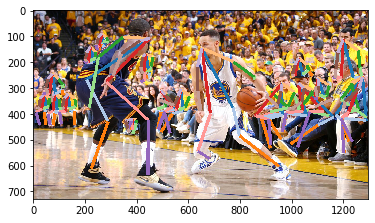

In [18]:
from PIL import Image
from PIL import ImageDraw, ImageFont
import numpy as np

def drawline(draw, z, f, t, c):
    if f in z and t in z:
        draw.line((z[f][0], z[f][1], z[t][0], z[t][1]), fill=tuple(c), width=12)
        
def gen_colors():
    arr = plt.cm.tab20(np.linspace(0, 1, 20))
    arr=arr*255
    return arr.astype(int)
    
def draw_stickman(img, json_str):
    draw = ImageDraw.Draw(img)
    data = json.loads(json_str)
    z = data[0]
    colors = gen_colors()
    drawline(draw, z, 'left_hip', 'nose', colors[0])
    drawline(draw, z, 'left_hip', 'left_knee', colors[1])
    drawline(draw, z, 'left_knee', 'left_ankle', colors[2])
    drawline(draw, z, 'left_shoulder', 'nose', colors[3])
    drawline(draw, z, 'left_shoulder', 'left_elbow', colors[4])
    drawline(draw, z, 'left_elbow', 'left_wrist', colors[5])
    drawline(draw, z, 'right_hip', 'nose', colors[6])
    drawline(draw, z, 'right_hip', 'right_knee', colors[7])
    drawline(draw, z, 'right_knee', 'right_ankle', colors[8])
    drawline(draw, z, 'right_shoulder', 'nose', colors[9])
    drawline(draw, z, 'right_shoulder', 'right_elbow', colors[10])
    drawline(draw, z, 'right_elbow', 'right_wrist', colors[11])
    plt.imshow(img)
    plt.show()

def draw_people(img, json_str):
    draw = ImageDraw.Draw(img)
    data = json.loads(json_str)
    for z in data:
        colors = gen_colors()
        drawline(draw, z, 'left_hip', 'nose', colors[0])
        drawline(draw, z, 'left_hip', 'left_knee', colors[1])
        drawline(draw, z, 'left_knee', 'left_ankle', colors[2])
        drawline(draw, z, 'left_shoulder', 'nose', colors[3])
        drawline(draw, z, 'left_shoulder', 'left_elbow', colors[4])
        drawline(draw, z, 'left_elbow', 'left_wrist', colors[5])
        drawline(draw, z, 'right_hip', 'nose', colors[6])
        drawline(draw, z, 'right_hip', 'right_knee', colors[7])
        drawline(draw, z, 'right_knee', 'right_ankle', colors[8])
        drawline(draw, z, 'right_shoulder', 'nose', colors[9])
        drawline(draw, z, 'right_shoulder', 'right_elbow', colors[10])
        drawline(draw, z, 'right_elbow', 'right_wrist', colors[11])
    plt.imshow(img)
    plt.show()

people = json.loads(json_keypoints)
print(f'NUMBER OF PEOPLE {len(people)}')
draw_people(img, json_keypoints)